This notebook suggests an approach for generating dynamicly kategorial data. The idea is, to define intial kategories as a small bag of unique elements with different behaviours and probabilities, that a behaviour will appear. (As an example: A behaviour is: elaborate this topic, and the probility according to the behaviour will result in a probaility a topic is elaborated. Another behaviour for example is the tendency for beeing used in different documents. The following UML activity diagram summatizes the algorithm.

(As a prototype this notebook will use random uniform distributions as functions). 

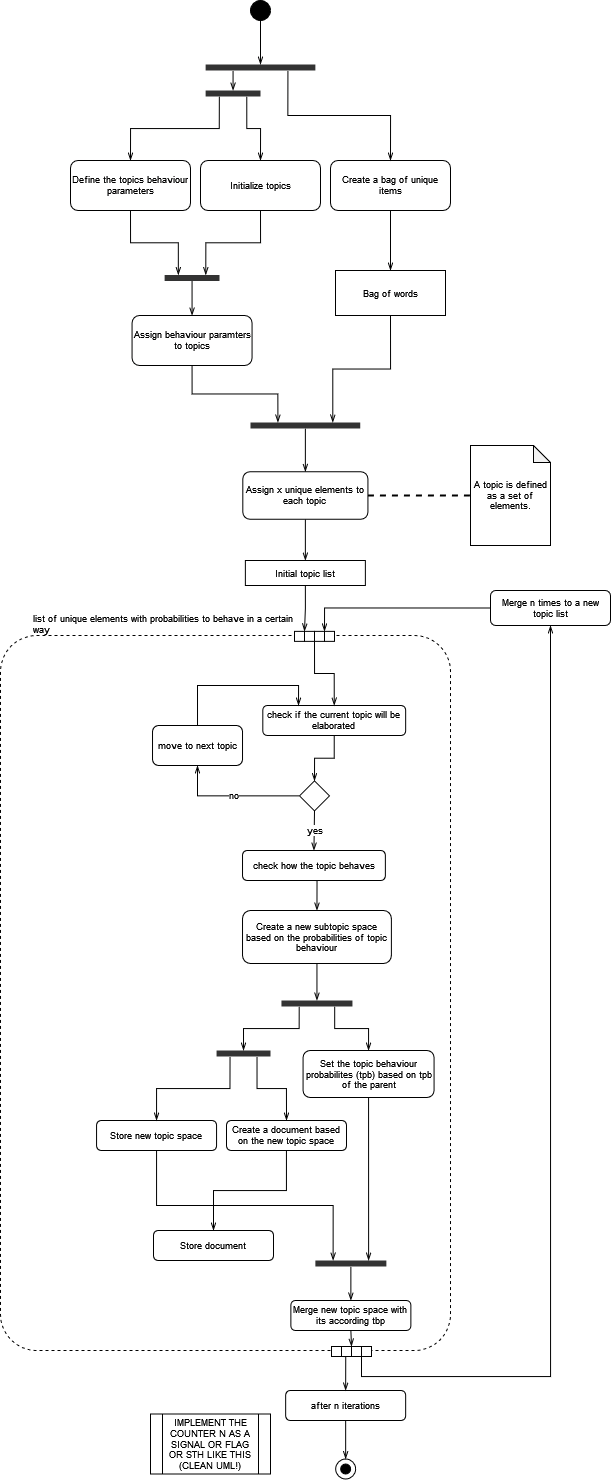

In [1]:
## First the needed bibliotheks and imports have to be set up
#!pip install numpy
#!pip install faker
#!...


##RENAME TEMPORARY VARIABLES WITH A t_ IN THE BEGINNING   

In [2]:
#this cell handles imports / set ups

##LIBRARIES

#"Faker is a Python package that generates fake data for you. " [from the Faker documentation]
#import faker library
from faker import Faker
#create an instance of Faker
fake = Faker()


import random as rnd
import numpy as np
import pandas as pd
import random as rng
import matplotlib.pyplot as plt



# Set the precision of decimals for the whole notebook on 2
np.set_printoptions(precision=3, suppress=True)

In [3]:
##THIS CELL CONTAINS SOME SIMPLE FUNCTIONS WHICH WILL BE USED MORE OFTEN IN THE PROGRAMM

#Declare a decision boundry function, to create a boundry value each time a decision is to be made**
def decide():
    decision_boundry = np.random.uniform(0,1,1)
    return decision_boundry

#Declare a function to let values vary along a uniform distribution around a given variation. This is a placeholder function for **
def uniform_variance(value, variation):
    low_boarder = value - value * variation
    top_boarder = value + value * variation
    
    value = np.random.uniform(low_boarder,top_boarder,1)
    return value

In [4]:
###GENERATE BAG OF UNIQUE ELEMENTS
##Set the size of the bag of unique Elements
    
#PUT LATER INTO "MAIN-CELL"
words_to_create = 150000

#This function takes an integer and returns a list of unique words which is the size of the given integer minus deletet doublicates 
def create_bag_of_words(word_amount_to_create):

    words = []

    words_created=0
    
    while words_created < word_amount_to_create:
        words.append(fake.word())
        words_created = words_created + 1 

    
    #check for duplikates
    unique_words = []
    double = 0
    for x in words:
        if x not in unique_words:
            unique_words.append(x)
        else:
            double=+1
    
    return unique_words
            
            
#CREATE A FUNCTION FOR FREQUENTLY USED WORDS (FOR SENTENCE GENERATION)
def create_bag_of_frequently_used_words():
    #Create a list of frequently used words
    frequently_used_words = []
    frequently_used_words.append(words[:100])
    del words[:100]
    
    return frequently_used_words


words = create_bag_of_words(words_to_create)
## Comment:
#Combination of frequently used words and 'normal' words to create sentences with topic words**

In [5]:
###INITIALIZE FIRST ROW OF TOPICS

##Create bag of x topics
topic_amount = 5

#This function takes an amount of topics as integer and returns a list of empty lists according to the amount
def initialize_empty_topics(amounts_of_topics):
    
    topics_to_create = amounts_of_topics

    ##Create empty list of initial topics
    topic_list_empty = []
    topics_created = 0
    while topics_created < topics_to_create:
        topic_list_empty.insert(0, [])
        topics_created += 1
    
    return topic_list_empty


topic_list_empty = initialize_empty_topics(topic_amount)

topic_list_empty

[[], [], [], [], []]

In [6]:
###INITIALIZE BEHAVIOURAL PROBABILITIES FOR EACH TOPIC

##This function takes an empty topic list and generate for each topic probabilities, different behaviours will occeu
##Note: The behaviours are implemented as fucntions which are called depending on a random decisionboundry for each 
##generation step and the in this function (initialize_topic_behaviour_parameters) stated probabilities. This 
##implementation aims to mimic tendencies for behaviours.
def initialize_topic_behaviour_parameters(empty_topic_list):

    for topic in empty_topic_list:
        
        
        #Initialize the behavioural parameters**
        topic_probability_is_elaborated = [np.random.uniform(0,1,1)]
        
        topic_probability_creates_new_word = [np.random.uniform(0,0.5,1)]
        topic_probability_uses_different_topic = [np.random.uniform(0,0.5,1)]
        #Setting the behavioural parameters here just with implemented with standard uniform distributions in a certain range
        #between 0 and 1. Refining these functions in future work could include changing behavioural probabilities depending 
        #on topic size and topic contents.
        
        
        behavioural_paramters = [topic_probability_is_elaborated, topic_probability_uses_different_topic, topic_probability_creates_new_word]
        #,topic_probability_creates_new_word, topic_probability_uses_different_topic
        
        #The parameters are stored in a tupel, so the tupel can be appended to 
        #a topic as behavioural probabilites and can alway be called as the
        #last item in the list of elements of a topic (topic words are inserted in first position)
        #This architecture is designed to support future implementations of different
        #behavioural paramters.
        
        ##FUTURE WORK: Disruptive Technologien implementieren: Ein Topic einstampfen, wenn ein anderes Steigt.
        ##FUTRE WORK: Den Gedanken von Ressourcen pro Generation implementieren, so wie es wörter für topic gibt, kann es
        ##Topics für neue Generation geben.

        topic.append(behavioural_paramters)
        

initialize_topic_behaviour_parameters(topic_list_empty)
topic_list_empty

[[[[array([0.206])], [array([0.409])], [array([0.122])]]],
 [[[array([0.601])], [array([0.341])], [array([0.2])]]],
 [[[array([0.314])], [array([0.434])], [array([0.247])]]],
 [[[array([0.24])], [array([0.151])], [array([0.156])]]],
 [[[array([0.755])], [array([0.229])], [array([0.421])]]]]

In [7]:
###INITIALIZE KEYWORDS FOR EACH TOPIC

#State the low and top boarder for key words per topic
min_words_per_topic = 1 
max_words_per_topic = 5


#Define a function which will return a uniform distributed random** amount of keywords per topic, in the range of 
#min_words_per_topics to max_words_per_topic
def set_keywordamount_per_topic():
    topic_keywords = rnd.randint(min_words_per_topic, max_words_per_topic)
    return topic_keywords


#Define a function which will insert the initial keywords for every topic
def initialize_keywords_to_topic(empty_topic_list):
    for topic in empty_topic_list:
        keyword_amount = set_keywordamount_per_topic()
        keywords_inserted = 0
        while keywords_inserted < keyword_amount:
            #Append a unique word to the topic as a keyword of this topic
            topic.insert(0,words[keywords_inserted])
            #Delete the word out of the baggs of words to ensure, this entry won't be taken a second time
            del words[keywords_inserted]
            keywords_inserted = keywords_inserted +1
    return (empty_topic_list)

topic_list = initialize_keywords_to_topic(topic_list_empty)
# Print the keywords of each topic.
for topic in topic_list:
    print(topic)

['finally', 'so', 'play', 'feeling', [[array([0.206])], [array([0.409])], [array([0.122])]]]
['find', [[array([0.601])], [array([0.341])], [array([0.2])]]]
['fund', [[array([0.314])], [array([0.434])], [array([0.247])]]]
['us', [[array([0.24])], [array([0.151])], [array([0.156])]]]
['table', 'run', [[array([0.755])], [array([0.229])], [array([0.421])]]]


In [8]:
#TRIGGERFUNCTION TUPLE TRACKER 
#For this prototype, the new information space is embedded within the topics. This approach spares the need of indexing the
#additional information to the according topics. 

#The Information space is appended to each probability of a topic as a list of lists, each list can contain an own information
#space. This approach is motivated by the thought of further development and to enable the use of multiple behaviour appereance 
#patterns in the information space. The pair is designed to hold the following information:
#[counter on appeareance of a behaviour after a choosen counting function[list of booleans along the generations]]

def initialize_behaviour_tracking_space(topic_list):
    for topic in topic_list:
        
        counter = int
        boolean_list = []
        behaviour_tracker = [counter,boolean_list]
        for behaviour in topic[-1]:
            print(behaviour)
            behaviour.append([behaviour_tracker])
        #temporary counter t_c

#Now with this initial placeholders triggerfunctions, which insert and count the appearences of behaviour can be called every-
#time after an a behaviour is activated.

In [9]:
topic_list

[['finally',
  'so',
  'play',
  'feeling',
  [[array([0.206])], [array([0.409])], [array([0.122])]]],
 ['find', [[array([0.601])], [array([0.341])], [array([0.2])]]],
 ['fund', [[array([0.314])], [array([0.434])], [array([0.247])]]],
 ['us', [[array([0.24])], [array([0.151])], [array([0.156])]]],
 ['table', 'run', [[array([0.755])], [array([0.229])], [array([0.421])]]]]

In [10]:
###SET OF FUNCTIONS FOR THE BEHAVIOUR OF WORD COMPOSITION FOR SUBTOPIC

##Each function is connected to each topic with the tuple holding propabilities of a topic, these probabilities are
##are the tendencies, that a behaviour (declared in the following function set) will appear. With this implementation
##behaviours (defined as functions) can be connected to topics with different tendencies to appear with probabilities.
##Note: To embedd a dynamicly working structure with different amounts of function inputs, future work should replace
##the tuple with (something like) a nested list which generates itself depending on the set of functions picked.
##Note: Each of these functions can call topic as the current list of keywords and probabilites of a topic as they are called
##in create_subtopic_space which is called in elaborate_topic_list on each topic of the given 

#This function just connects two words to a new word and cuts a word if the connected words becomes to long. This can be 
#refined by regenerating two complete new words which can be topics. 
def creates_new_word(word):
    print(len(word))
    #word = word + words[rnd.randint(0,20)]
    
    # If the word gets to long cut it at a random amount between 2 and 4
    if len(word)>15:
        word = word[-6:]
        #print(word[:5])
    return word


#This function alway returns the first word of a random topic
def use_different_topic():
    t_random = rnd.randint(0,len(topic_list)-1)
    word = str
    word = topic_list[t_random][0]
    
    #Increase the counter for word from topic is used
    return word

In [11]:
###CREATE A SUBTOPIC SPACE FOR TOPIC




#This function is called by elaborate_topic_list and takes a topic as a list of elements within this topic and the
#information of tendencies how the topic behaves as a tuple of probabilities and returns an elaboration of that topic,
#here called subtopic (a subtopic is an elaboration of a topic) with changed probabilities.
def create_subtopic_space(topic):
    
    t_subtopic = []
    
    
    #Set the amounts of words used in that subtopic**
    subtopic_word_amount = rnd.randint(1,8)
    subtopic_words_picked = 0
    print(topic_list)
    while subtopic_words_picked < subtopic_word_amount:
        decisionboundry = decide()
        #topic_list[position of topics][position of words in topics]

        #Always use a random word from the topic space for the subtopic
        position_word_elaborated = rnd.randint(0,len(topic)-1)
        #print(position_word_elaborated)

        t_subtopic.insert(0,topic[position_word_elaborated])
        #print(topic[position_word_elaborated])
        subtopic_words_picked += 1
        
        
        
        
        ##Check if a special behaviour for elaboration is triggered
        #Set the decision boundry new for each elaboration (doing so and not setting one decision boundry) for each
        #generation enables the behaviour of tendencies.
        
        #Maybe write a document for another topic with key words from this topic. (New version of "Maybe use a different topic here")
        #This change enables to keep track of the use of a topic within other topics, because the behaviour of using one topic
        #is decided in one place.
        #THIS FUNCTION USES JUST THE "Maybe use a different topic here" but takes way more words from that topic so the new topic
        #is based on the other topic and the own topic is more likeley to be just used.  
        
        
        #Maybe use a different topic here
        #OUTDATED: write_in_different_topic() is new version
        #probability_use_other_topic = 0.5 #**
        #if probability_use_other_topic > decisionboundry:
        #    t_word = str
        #    t_word = use_different_topic()
        #    t_subtopic.insert(0,t_word)
        #    subtopic_words_picked += 1
        
        
        ##INDIZES ANPASSEN!!!!
        #Maybe create a new word
        if topic[-1][0][0][0] > decisionboundry:
            #subtopic[0] uses the word which was just inserted
            new_word = creates_new_word(t_subtopic[rnd.randint(0,len(t_subtopic)-1)])
            t_subtopic.insert(0,new_word)
            #print(subtopic)
            subtopic_words_picked += 1
            
        #Maybe bring a new word in topic space.. pending

        #Maybe use a topic from another topic space (parent generation) ...pending


    ##Vary the behaviour probabilities of each subtopic**
    #sub_topic_paramter_1 = uniform_variance(topic[-1][0],0.1)
    #sub_topic_paramter_2 = uniform_variance(topic[-1][1],0.1)
    subtopic_parameters = np.random.uniform(0,1,1), np.random.uniform(0,1,1)
    t_subtopic.append(subtopic_parameters)

    
    #print(t_subtopic)
    #print(topic)
    return t_subtopic

In [12]:
topic[-1][0][-1]

array([0.755])

In [13]:
###THIS CELL elaborates a given list of topics to a next generation of topic

#Create the list, where each subtopic generation will be stored  
topic_space_master = []

subtopic = []



#This function takes a list of topics, checks if the probability if a topic is elaborated and if yes, 
#calls create_subtopic_space on the current topic, takes the result and stores it as a sub topic in the subtopic_space.
#In the end the function appends the temporary subtopic_space to the global topic_space_master. (This implementation,
#let have each generation stored in an own list of lists with the most current once in the beginning)
def elaborate_topic_list(topic_list):

    subtopic_space = []
    for topic in topic_list:
        
        topic_counter = 0
        
        #This loop elaborates a topic dpeending on its probability to be elaborated until the decision_boundry will be
        #above the topic probability for being elaborated
        while True: 
            
            decision_boundry = decide()

            t_subtopic = []
            
            
            #subtopic_space = []
            if topic[-1][0][0] > decision_boundry:
                #print(topic[-1][0][0])
                #print(decision_boundry)
                
                #Call the create_subtopic_space_function which returns a subtopic space for the topic including new elements and 
                #new behaviour parameters depending on the topic given as input and append it to the subtopic space.

                t_subtopic = create_subtopic_space(topic)

                
                
                #Store the new generation
                subtopic_space.append(t_subtopic)
                #print(subtopic_space)
                #print("Appending subtopic")
                
                topic_counter += 1
                
                ##Write the information, that the behaviour is triggered in the informationspace on behaviour
                #topic[last element = behaviour list]
                    #[first element = first behaviour set with probability and information space]
                    #[last element = the informationspace on the behaviour]
                    #[first element = a counter for the amount of behaviour]
                topic[-1][0][-1][0][0] = topic[-1][0][-1][0][0] + 1
                #this function just counts everytime a topic is elaborated
                
                if topic_counter > 10:
                    break
            else:
                #print("Breaking while")
                break
    
    #print("Returning subtopic")
    #print(subtopic_space)
    #for t_subtopic in 
    #print(t_subtopic)
    return subtopic_space


In [14]:
topic[-1]

[[array([0.755])], [array([0.229])], [array([0.421])]]

In [15]:
###LAST CELL TO EXECUTE
###INITIALIZE GENERATOR OVER N GENERATIONS

#Set the amount of generations to create
amount_of_generations = 4

topic_space_master = []

#This function creates a given amount of generation by calling the elaborate_topic_list function
def start_generator(list_of_topics):
    #Insert the root topics to the master list
    topic_space_master.insert(0,list_of_topics)
    print("topic_space_master")
    print(topic_space_master)
    
    #Initialize the new_topic_generation variable which is handed to the elaborate_topic_list function
    new_topic_generation = elaborate_topic_list( topic_space_master[0])
    topic_space_master.insert(0,new_topic_generation)
    
    
    generations_created = 0
    print(generations_created)
    
    while generations_created < amount_of_generations:
     
        next_topic_generation = elaborate_topic_list(topic_space_master[0])
        print(next_topic_generation)
        topic_space_master.insert(0,next_topic_generation)
        
        generations_created += 1

    return topic_list


    ##HANDING NEW TOPIC SPACE TO THE NEXT ITERATION NEEDED.

In [16]:
topic_list_master = start_generator(topic_list)

topic_space_master
[[['finally', 'so', 'play', 'feeling', [[array([0.206])], [array([0.409])], [array([0.122])]]], ['find', [[array([0.601])], [array([0.341])], [array([0.2])]]], ['fund', [[array([0.314])], [array([0.434])], [array([0.247])]]], ['us', [[array([0.24])], [array([0.151])], [array([0.156])]]], ['table', 'run', [[array([0.755])], [array([0.229])], [array([0.421])]]]]]
[['finally', 'so', 'play', 'feeling', [[array([0.206])], [array([0.409])], [array([0.122])]]], ['find', [[array([0.601])], [array([0.341])], [array([0.2])]]], ['fund', [[array([0.314])], [array([0.434])], [array([0.247])]]], ['us', [[array([0.24])], [array([0.151])], [array([0.156])]]], ['table', 'run', [[array([0.755])], [array([0.229])], [array([0.421])]]]]
2
2


IndexError: invalid index to scalar variable.

In [ ]:
topic_space_master

In [ ]:
topic_list

In [ ]:
##Seems like the generator is working. The quality of the output can be handled by tuning the probabilities and behaviour
##functions, but the topic_space_master documents contains a list generations and each generations is a list of lists where
##each list in a generation represents one subtopic (one elaboration). These subtopics can be used and seen as the keyword 
##base for documents dealing with these topics and be used as input for sentence generation to simulate noise in speech.

In [ ]:
#Define a bag of frequently used words:
used_words = words[-50:]
del words[-50:]

frequently_used_words = words[-20:]
del words[-20:]

often_used_words = words[-5:]
del words[-5:]

In [ ]:
#WRITE ABSTRACTS FROM TOPIC SPACE FUNCTION

abstracts_master = []
#This functions writes an abstract for each topic to embedd the noise of text data.**
def write_abstracts(master_topic_space):
    for generation in master_topic_space:
        #print(generation)
        abstract_topic_space = []
        for topic in generation:
            #print(topic)
            abstract=[]
            for word in topic[:-1]:
                word_usage_amount = rnd.randint(1,3)
                words_used=0
                while words_used < word_usage_amount:
                    #print(word)
                    abstract.insert(0,fake.sentence(nb_words = rnd.randint(5,10), ext_word_list=[
                    word,
                    word,
                    word,
                    frequently_used_words[rnd.randint(0,len(frequently_used_words)-1)],
                    frequently_used_words[rnd.randint(0,len(frequently_used_words)-1)],
                    often_used_words[rnd.randint(0,len(often_used_words)-1)],
                    used_words[rnd.randint(0,len(used_words)-1)],
                    used_words[rnd.randint(0,len(used_words)-1)],
                    words[rnd.randint(0,len(words)-1)],
                    words[rnd.randint(0,len(words)-1)]
                    ]))
                    words_used = words_used + 1
                    #print(words_used)
            abstract_topic_space.insert(0,abstract)
        abstracts_master.insert(0,abstract_topic_space)
    return abstracts_master


#Note: The purpose of this cell is to write abstract out of the keywords to embedd noise with sentences.
#Thus different amount of 'word noise' can be embedded and the speach recognition algorithms can be tested
#on accurate finding the words which were key parts of the topics.
#IMPORTANT!: Check 2-3 Abstract for word compositions to deduce how sentences are generated here.
abstracts = write_abstracts(topic_space_master)



In [ ]:
abstracts

In [ ]:
topic_space_master

# Triggerfunction

Die Triggerfunktionen werden ein Set von Funktionen sein, welche sobald festgelegte Bedingungen in der Entwicklung einer Generation auftreten, die Verhaltenswahrscheinlichkeiten von auszuwählenden Topics umschreibt. Dies hat den zweck, eine Umgebung zu entwickeln, in welcher latent wirkende Muster bereichsübergreifend aktiv sein können. Da diese Umgebung beliebig komplex und verrauscht konstruiert werden kann, soll dies somit ein Testfeld für prognostische, patternanalysierende Algorithmen bieten.


Hierfür muss jedeoch zunächst ein neuer Informationsraum geschaffen werden, welcher verwendet wird um Änderungen über Generationen besser nachvollziehen zu können. Dies bedeutet, dass eine Triggerfunktion, welche ein Verhalten trackt aus drei Teilfunktionaltitäten besteht: 
    1. Das Sammeln der benötigten Informationen für den neuen Informationsraum. 
    2. Das Bewerten des neuen Informationsraumen ob eine Änderung getriggert wird.
    3. Falls getriggert: Das Ändern der Verhaltenswahrscheinlichkeiten.


...
Um den neuen Informationsraum zu schaffen, gibt es verschiedene Ansätze. So wird für diesen Prototypen ein Ansatz verfolgt, bei welchem geschaut wird, ob ein Verhalten getriggert wurde und wie oft ein Verhalten aufgetreten ist. Dieser Ansatz hat dabei den Vorteil, dass alles Herausschreiben von Informationen im Code hinter der Entscheidung, ob ein Verhalten getriggert werden soll, implementiert werden kann.
